In [1]:
# Function to extract virtual epochs for classification
def extract_virtual_epochs(models_path):
    with open(os.path.join(models_path, "metrics/virtual_epochs.json"), "r") as read_file:
        metrics_dict = json.load(read_file)

    test_losses, test_precisions, test_recalls, test_F1Scores, test_tanimotos = [], [], [], [], []

    for _, metrics in metrics_dict.items():
        if metrics is None: 
            break

        test_losses.append(metrics["test_loss"])
        test_precisions.append(metrics["precision"])
        test_recalls.append(metrics["recall"])
        test_F1Scores.append(metrics["F1_score"])
        test_tanimotos.append(metrics["tanimoto"])

    return test_losses, test_precisions, test_recalls, test_F1Scores, test_tanimotos

# Function to extract virtual epochs for regression
def extract_virtual_epochs_regression(models_path):
    with open(os.path.join(models_path, "metrics/virtual_epochs.json"), "r") as read_file:
        metrics_dict = json.load(read_file)

    valid_loss, valid_accuracy = [], []
    acc_C, acc_Br, acc_Cl, acc_F, acc_I, acc_N, acc_O, acc_P, acc_S, acc_H = [], [], [], [], [], [], [], [], [], []

    for _, metrics in metrics_dict.items():
        if metrics is None: 
            break

        valid_loss.append(metrics["valid_loss"])
        valid_accuracy.append(metrics["valid_accuracy"])
        acc_C.append(metrics["acc_atom_dict"]["C"])
        acc_Br.append(metrics["acc_atom_dict"]["Br"])
        acc_Cl.append(metrics["acc_atom_dict"]["Cl"])
        acc_F.append(metrics["acc_atom_dict"]["F"])
        acc_I.append(metrics["acc_atom_dict"]["I"])
        acc_N.append(metrics["acc_atom_dict"]["N"])
        acc_O.append(metrics["acc_atom_dict"]["O"])
        acc_P.append(metrics["acc_atom_dict"]["P"])
        acc_S.append(metrics["acc_atom_dict"]["S"])
        acc_H.append(metrics["acc_atom_dict"]["H"])

    return valid_loss, valid_accuracy, acc_C, acc_Br, acc_Cl, acc_F, acc_I, acc_N, acc_O, acc_P, acc_S, acc_H, metrics_dict

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json


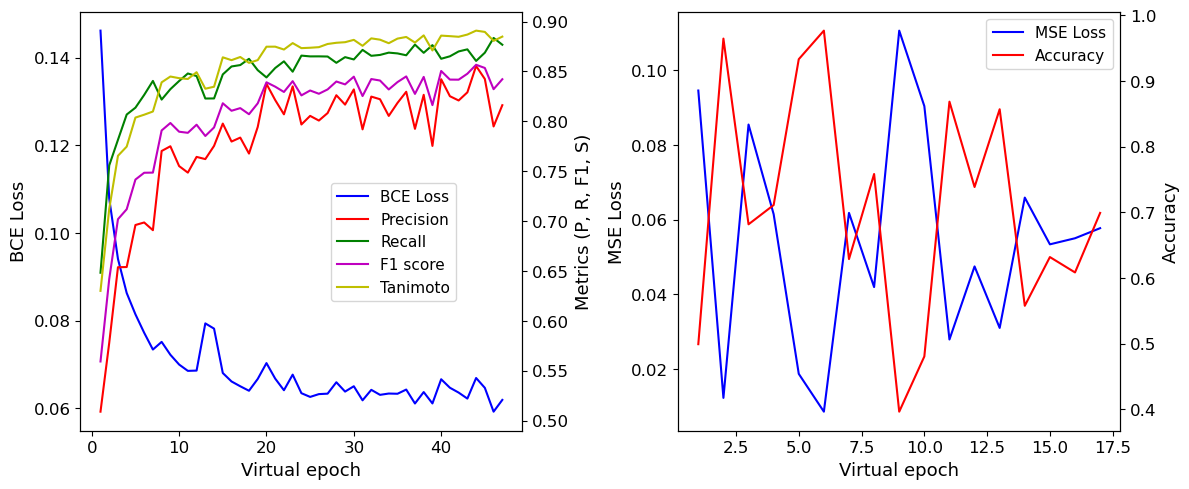

In [3]:


# Load classification metrics
models_path_classification = '../../experiments/300k_1024_all_ks_dropout_0_5'
test_losses, test_precisions, test_recalls, test_F1Scores, test_tanimotos = extract_virtual_epochs(models_path_classification)

# Load regression metrics
models_path_regression = f'../../experiments/regression_w_H/'
(
    valid_loss, valid_accuracy,
    acc_C, acc_Br, acc_Cl, acc_F, acc_I, acc_N,
    acc_O, acc_P, acc_S, acc_H, metrics_dict
) = extract_virtual_epochs_regression(models_path_regression)

epochs_classification = np.arange(len(test_losses)) + 1
epochs_regression = np.arange(len(valid_loss)) + 1

# Plotting both in a single figure
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting classification data on the left
ax1.plot(epochs_classification, test_losses, 'b-', label='BCE Loss')
ax1.set_ylabel('BCE Loss', fontsize=13)
ax1.tick_params(axis='y')

ax1_metrics = ax1.twinx()
ax1_metrics.plot(epochs_classification, test_precisions, 'r-', label='Precision')
ax1_metrics.plot(epochs_classification, test_recalls, 'g-', label='Recall')
ax1_metrics.plot(epochs_classification, test_F1Scores, 'm-', label='F1 score')
ax1_metrics.plot(epochs_classification, test_tanimotos, 'y-', label='Tanimoto')
ax1_metrics.set_ylabel('Metrics (P, R, F1, S)', fontsize=13)

lines1, labels1 = ax1.get_legend_handles_labels()
lines1_metrics, labels1_metrics = ax1_metrics.get_legend_handles_labels()
lines1 += lines1_metrics
labels1 += labels1_metrics
ax1.legend(lines1, labels1, loc='upper right', fontsize=11)

ax1.set_xlabel('Virtual epoch', fontsize=13)
ax1.tick_params(axis='both', which='both', labelsize=12)
ax1_metrics.tick_params(axis='y', labelsize=12)
ax1.legend(lines1, labels1, loc='center left', bbox_to_anchor=(0.55, 0.45), fontsize=11)

# Plotting regression data on the right
ax2.plot(epochs_regression, valid_loss, 'b-', label='MSE Loss')
ax2.set_xlabel('Virtual epoch', fontsize=13)
ax2.set_ylabel('MSE Loss', color='black', fontsize=13)
ax2.tick_params(axis='y', labelcolor='black')

ax2_acc = ax2.twinx()
ax2_acc.plot(epochs_regression, valid_accuracy, 'r-', label='Accuracy')
ax2_acc.set_ylabel('Accuracy', color='black', fontsize=13)
ax2_acc.tick_params(axis='y', labelcolor='black', labelsize=12)

lines2 = ax2.get_lines() + ax2_acc.get_lines()
labels2 = [line.get_label() for line in lines2]
ax2.legend(lines2, labels2, loc='upper right', fontsize=11)

ax2.tick_params(axis='both', which='both', labelsize=12)

fig.tight_layout()
plt.savefig('combined_training_loss_plots.pdf', format="pdf", bbox_inches="tight")
plt.show()
